In [1]:
import kagglehub
vijayaadithyanvg_car_price_predictionused_cars_path = kagglehub.dataset_download('vijayaadithyanvg/car-price-predictionused-cars')

print('Data source import complete.')

100%|██████████| 3.76k/3.76k [00:00<00:00, 5.31MB/s]

Extracting files...
Data source import complete.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/vimalluuu/DataSets/refs/heads/main/car%20data.csv")
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape


(301, 9)

In [5]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [6]:
df.describe()


,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
print(df.columns)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


In [9]:
df = pd.get_dummies(df, drop_first=True)

2-**Data Cleaning and Feature Engineering**

In this phase, we clean and prepare the data for modeling. This includes removing any irrelevant or redundant columns.

In [10]:
df.head()
df.columns
df.shape

(301, 106)

In [11]:
df.duplicated().sum()

np.int64(2)

In [12]:
df = df.drop_duplicates()

In [13]:
print("The duplicate values is:", df.duplicated().sum())

The duplicate values is: 0


In [14]:
df.describe().style.format(precision=2).background_gradient(cmap='viridis')

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.00,299.00,299.00,299.00,299.00
mean,2013.62,4.59,7.54,36916.75,0.04
std,2.90,4.98,8.57,39015.17,0.25
min,2003.00,0.10,0.32,500.00,0.00
25%,2012.00,0.85,1.20,15000.00,0.00
50%,2014.00,3.51,6.10,32000.00,0.00
75%,2016.00,6.00,9.84,48883.50,0.00
max,2018.00,35.00,92.60,500000.00,3.00


In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/vimalluuu/DataSets/refs/heads/main/car%20data.csv")
df['Car_Age'] = 2025 - df['Year']
df = pd.get_dummies(df.drop(['Year', 'Car_Name'], axis=1), drop_first=True)
df = df.loc[:, ~df.columns.str.startswith('Car_Name_')]

In [16]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/vimalluuu/DataSets/refs/heads/main/car%20data.csv')

mean_values = df[['Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']].mean()
std_values = df[['Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']].std()

print("Means:")
print(mean_values)
print("\nStandard Deviations:")
print(std_values)

Means:
Selling_Price        4.661296
Present_Price        7.628472
Driven_kms       36947.205980
Owner                0.043189
dtype: float64

Standard Deviations:
Selling_Price        5.082812
Present_Price        8.642584
Driven_kms       38886.883882
Owner                0.247915
dtype: float64


In [17]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/vimalluuu/DataSets/refs/heads/main/car%20data.csv')

summary = df.groupby('Car_Name').agg({
    'Year': ['min', 'max'],
    'Selling_Price': ['mean', 'std', 'min', 'max'],
    'Present_Price': ['mean', 'std'],
    'Driven_kms': ['mean', 'std'],
    'Owner': ['mean']
}).reset_index()

summary.columns = ['Car_Name', 'Year_Min', 'Year_Max',
                   'Selling_Price_Mean', 'Selling_Price_Std', 'Selling_Price_Min', 'Selling_Price_Max',
                   'Present_Price_Mean', 'Present_Price_Std',
                   'Kms_Driven_Mean', 'Kms_Driven_Std',
                   'Owner_Mean']

print(summary.head(10))

                   Car_Name  Year_Min  Year_Max  Selling_Price_Mean  \
0                       800      2003      2003               0.350   
1                 Activa 3g      2008      2016               0.310   
2                 Activa 4g      2017      2017               0.400   
3             Bajaj  ct 100      2015      2015               0.180   
4         Bajaj Avenger 150      2016      2016               0.750   
5  Bajaj Avenger 150 street      2016      2016               0.600   
6         Bajaj Avenger 220      2016      2017               0.790   
7    Bajaj Avenger 220 dtsi      2010      2015               0.525   
8  Bajaj Avenger Street 220      2011      2011               0.450   
9        Bajaj Discover 100      2013      2013               0.270   

   Selling_Price_Std  Selling_Price_Min  Selling_Price_Max  \
0                NaN               0.35               0.35   
1           0.197990               0.17               0.45   
2                NaN            

3- **Data visualization**  

In [18]:
df['Car_Age'] = 2025 - df['Year']
import plotly.express as px

fig = px.scatter(df,
                 x='Present_Price',
                 y='Selling_Price',
                 color='Fuel_Type',
                 size='Car_Age',
                 hover_data=['Driven_kms', 'Owner', 'Transmission'])
fig.update_layout(title='Car Comparison: Present vs Selling Price',
                  xaxis_title='Present Price ',
                  yaxis_title='Selling Price ')
fig.show()

In [19]:
top_cars = df[['Car_Name', 'Present_Price', 'Selling_Price', 'Driven_kms', 'Owner', 'Fuel_Type', 'Transmission']]
top_cars = top_cars.sort_values(by='Selling_Price', ascending=False).head(10)
top_cars.style.set_caption("Top 10 Highest Selling Cars") \
       .background_gradient(cmap="Blues") \
       .format({'Present_Price': '₹ {:.2f} L', 'Selling_Price': '₹ {:.2f} L'})

,Car_Name,Present_Price,Selling_Price,Driven_kms,Owner,Fuel_Type,Transmission
86,land cruiser,₹ 92.60 L,₹ 35.00 L,78000,0,Diesel,Manual
64,fortuner,₹ 36.23 L,₹ 33.00 L,6000,0,Diesel,Automatic
63,fortuner,₹ 35.96 L,₹ 23.50 L,47000,0,Diesel,Automatic
51,fortuner,₹ 30.61 L,₹ 23.00 L,40000,0,Diesel,Automatic
93,fortuner,₹ 30.61 L,₹ 23.00 L,40000,0,Diesel,Automatic
82,innova,₹ 25.39 L,₹ 23.00 L,15000,0,Diesel,Automatic
96,innova,₹ 25.39 L,₹ 20.75 L,29000,0,Diesel,Automatic
59,fortuner,₹ 35.96 L,₹ 19.99 L,41000,0,Diesel,Automatic
66,innova,₹ 23.15 L,₹ 19.75 L,11000,0,Petrol,Automatic
62,fortuner,₹ 35.96 L,₹ 18.75 L,78000,0,Diesel,Automatic


In [20]:
df['Depreciation'] = df['Present_Price'] - df['Selling_Price']
df['Depreciation_%'] = (df['Depreciation'] / df['Present_Price']) * 100

compare_df = df[['Car_Name', 'Present_Price', 'Selling_Price', 'Depreciation', 'Depreciation_%']]
compare_df = compare_df.sort_values(by='Depreciation_%', ascending=False).head(10)
compare_df.style.set_caption("Top 10 Cars with Highest Depreciation") \
         .bar(subset='Depreciation_%', color='#ffa07a') \
         .format({'Present_Price': '₹ {:.2f} L', 'Selling_Price': '₹ {:.2f} L', 'Depreciation_%': '{:.1f}%'})

,Car_Name,Present_Price,Selling_Price,Depreciation,Depreciation_%
85,camry,₹ 23.73 L,₹ 2.50 L,21.230000,89.5%
77,corolla,₹ 12.35 L,₹ 1.50 L,10.850000,87.9%
200,Bajaj Pulsar 150,₹ 0.75 L,₹ 0.10 L,0.650000,86.7%
37,800,₹ 2.28 L,₹ 0.35 L,1.930000,84.6%
94,corolla altis,₹ 22.78 L,₹ 4.00 L,18.780000,82.4%
90,corolla altis,₹ 18.61 L,₹ 3.80 L,14.810000,79.6%
199,Honda CB Shine,₹ 0.58 L,₹ 0.12 L,0.460000,79.3%
78,corolla altis,₹ 22.83 L,₹ 5.25 L,17.580000,77.0%
55,corolla altis,₹ 15.04 L,₹ 3.60 L,11.440000,76.1%
47,wagon r,₹ 4.15 L,₹ 1.05 L,3.100000,74.7%


In [21]:
df['Car_Age'] = 2025 - df['Year']
summary = {
    'Total Cars': len(df),
    'Avg Present Price': df['Present_Price'].mean(),
    'Avg Selling Price': df['Selling_Price'].mean(),
    'Avg Car Age': df['Car_Age'].mean(),
    'Fuel Type Counts': df['Fuel_Type'].value_counts().to_dict()
}
pd.DataFrame.from_dict(summary, orient='index', columns=['Value']).style.set_caption("Market Summary ?")

,Value
Total Cars,301
Avg Present Price,7.628472
Avg Selling Price,4.661296
Avg Car Age,11.372093
Fuel Type Counts,"{'Petrol': 239, 'Diesel': 60, 'CNG': 2}"


In [22]:
fig2 = px.pie(df,
              names='Fuel_Type',
              title=" Fuel Type Distribution in Market",
              hole=0.4,
              color_discrete_sequence=px.colors.sequential.RdBu)

fig2.show()

In [23]:
fig3 = px.box(df,
              x='Transmission',
              y='Selling_Price',
              title="Selling Price by Transmission Type",
              color='Transmission')

fig3.show()

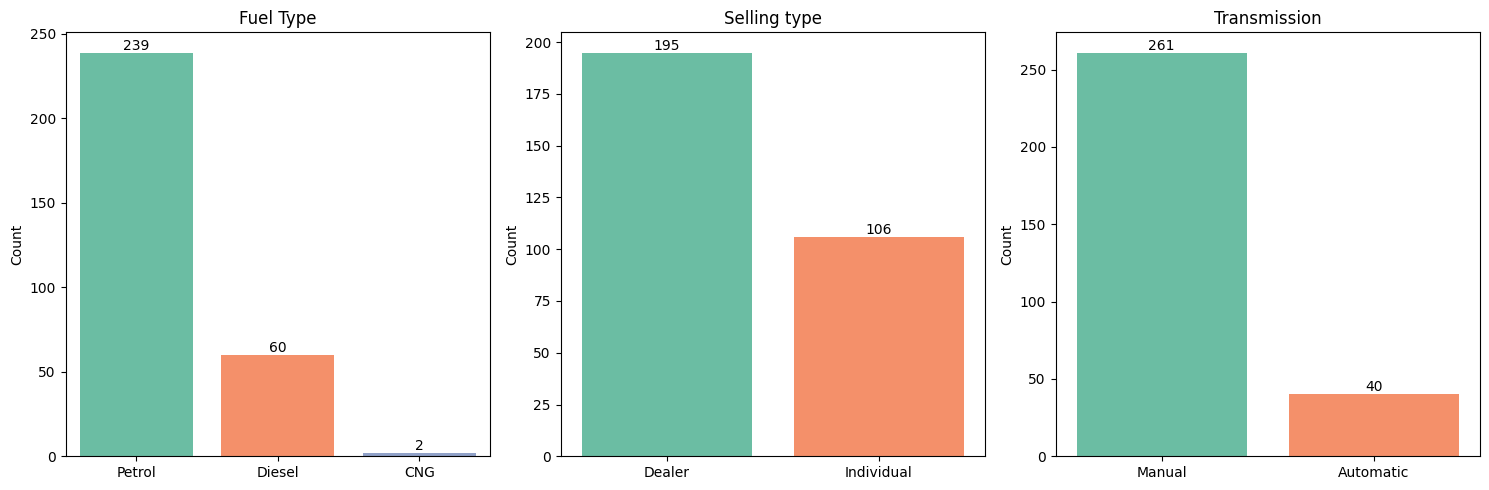

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/vimalluuu/DataSets/refs/heads/main/car%20data.csv')

categorical_columns = ['Fuel_Type', 'Selling_type', 'Transmission']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes = axes.ravel()

for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=df, palette='Set2', ax=axes[i], saturation=0.9)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'{column.replace("_", " ")}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

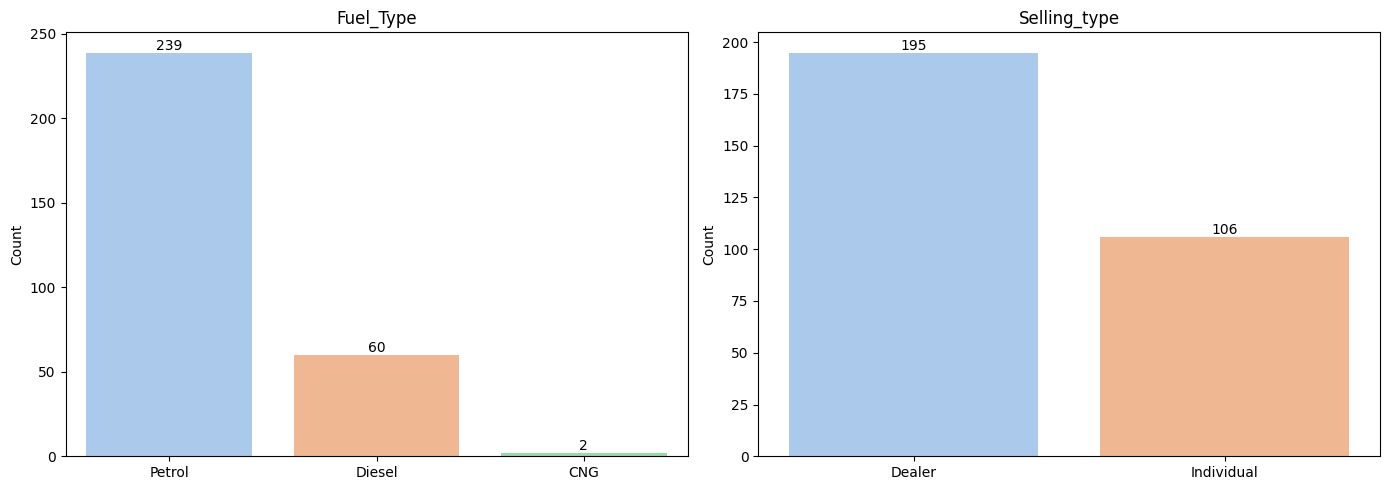

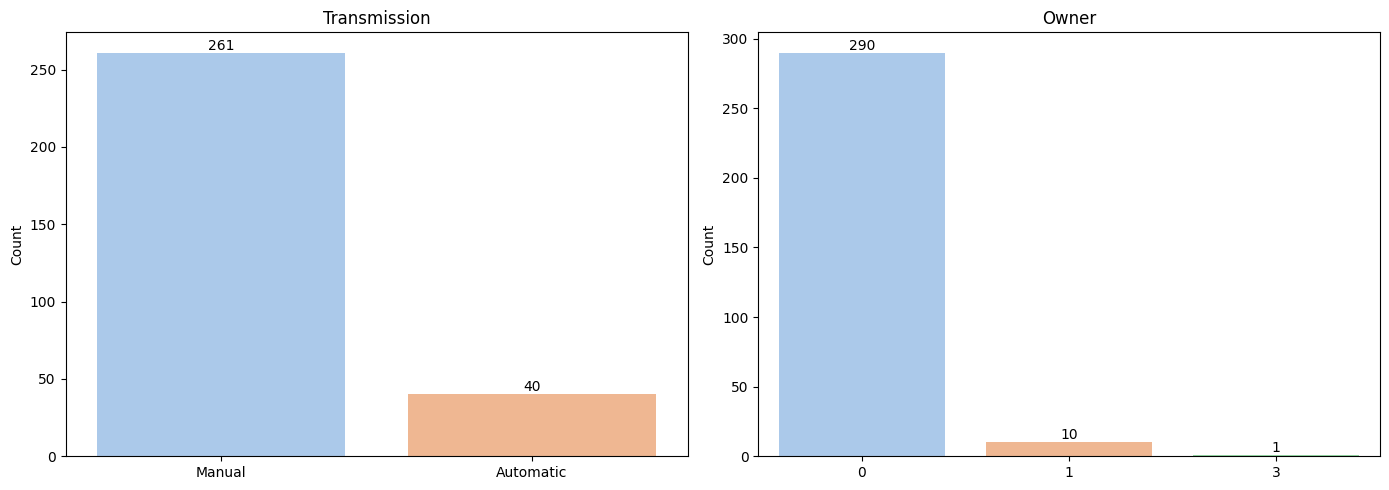

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = ['Fuel_Type', 'Selling_type', 'Transmission', 'Owner']

for i in range(0, len(cat_cols), 2):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    sns.countplot(x=cat_cols[i], data=df, palette='pastel', ax=axes[0])
    axes[0].set_title(cat_cols[i])
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Count')
    for container in axes[0].containers:
        axes[0].bar_label(container, color='black', fontsize=10)

    if i+1 < len(cat_cols):
        sns.countplot(x=cat_cols[i+1], data=df, palette='pastel', ax=axes[1])
        axes[1].set_title(cat_cols[i+1])
        axes[1].set_xlabel('')
        axes[1].set_ylabel('Count')
        for container in axes[1].containers:
            axes[1].bar_label(container, color='black', fontsize=10)
    else:
        axes[1].axis('off')

    plt.tight_layout()
    plt.show()

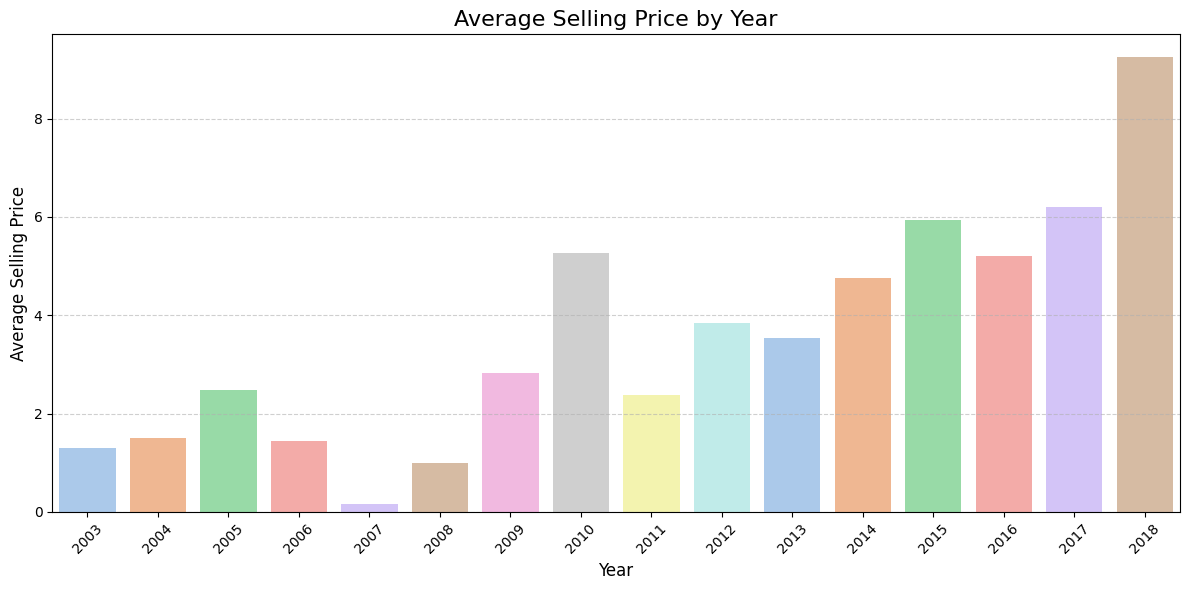

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Selling_Price', data=df, errorbar=None, palette='pastel')
plt.title('Average Selling Price by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Selling Price', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

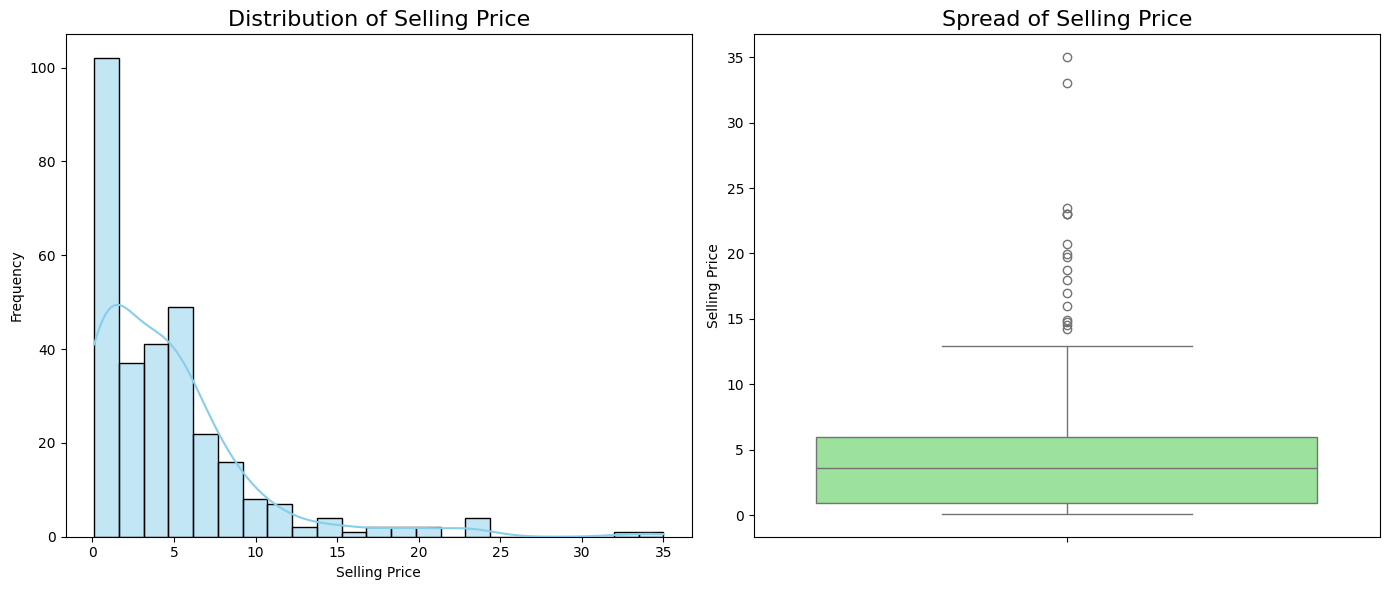

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.title('Distribution of Selling Price', fontsize=16)
sns.histplot(df['Selling_Price'], kde=True, color='skyblue')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.title('Spread of Selling Price', fontsize=16)
sns.boxplot(y=df['Selling_Price'], color='lightgreen')
plt.ylabel('Selling Price')

plt.tight_layout()
plt.show()

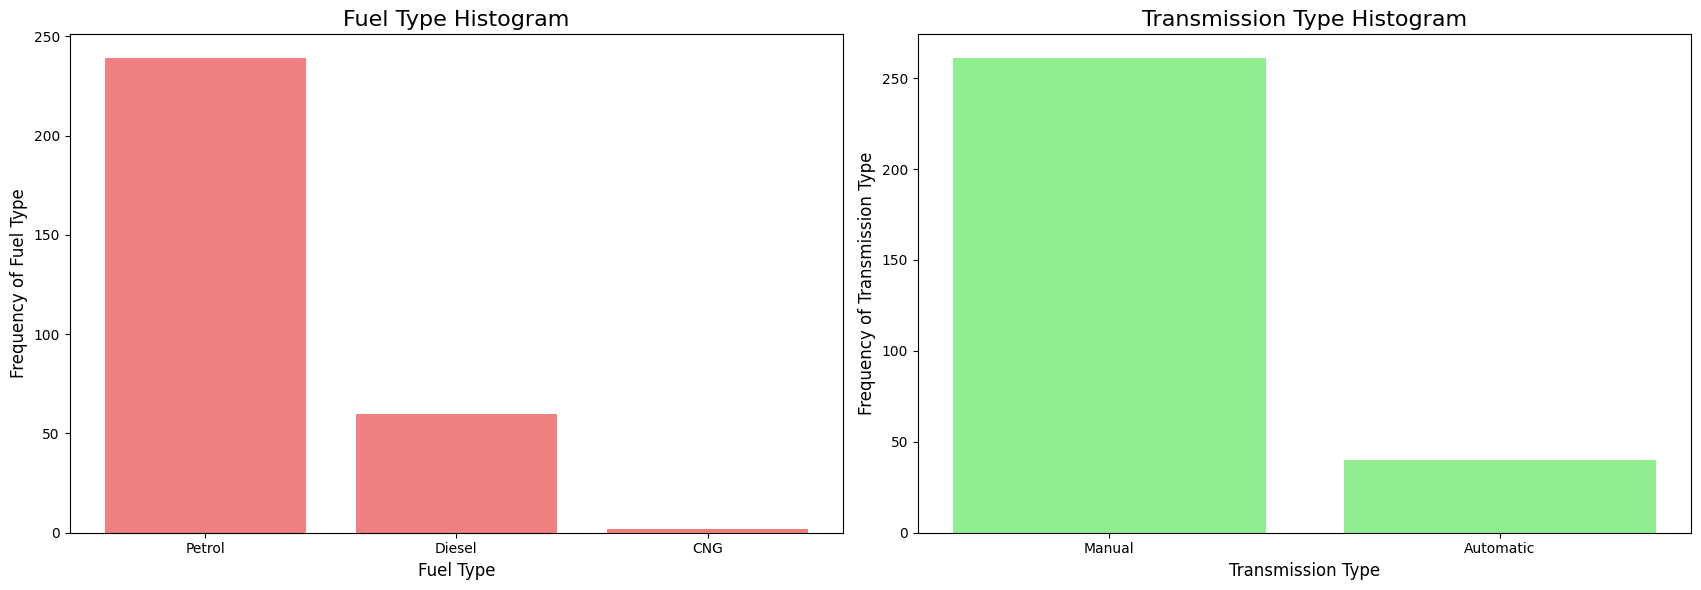

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 6))


plt.subplot(1, 3, 2)
fuel_counts = df['Fuel_Type'].value_counts()
plt.bar(fuel_counts.index, fuel_counts.values, color='lightcoral')
plt.title('Fuel Type Histogram', fontsize=16)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Frequency of Fuel Type', fontsize=12)

plt.subplot(1, 3, 3)

transmission_counts = df['Transmission'].value_counts()
plt.bar(transmission_counts.index, transmission_counts.values, color='lightgreen')
plt.title('Transmission Type Histogram', fontsize=16)
plt.xlabel('Transmission Type', fontsize=12)
plt.ylabel('Frequency of Transmission Type', fontsize=12)

plt.tight_layout()
plt.show()

4-**Model Training Using XGBoost**

With the training data prepared, we proceed to train a regression model using the XGBoost algorithm, a powerful and efficient gradient boosting framework. XGBoost is particularly well-suited for structured tabular data and often outperforms traditional algorithms due to its ability to capture complex patterns through an ensemble of decision trees. During this step, the model learns to map the input features to the target selling price.

In [29]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)


X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

model = XGBRegressor()
model.fit(X_train_encoded, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

5-**Model Evaluation**

Once the model is trained, we evaluate its performance on the testing data using key regression metrics such as the R² score and Root Mean Squared Error (RMSE). The R² score indicates how well the model explains the variance in the target variable, while RMSE gives insight into the average prediction error. High R² values and low RMSE scores suggest that the model is both accurate and reliable.

RMSE: 0.97
R² Score: 0.96


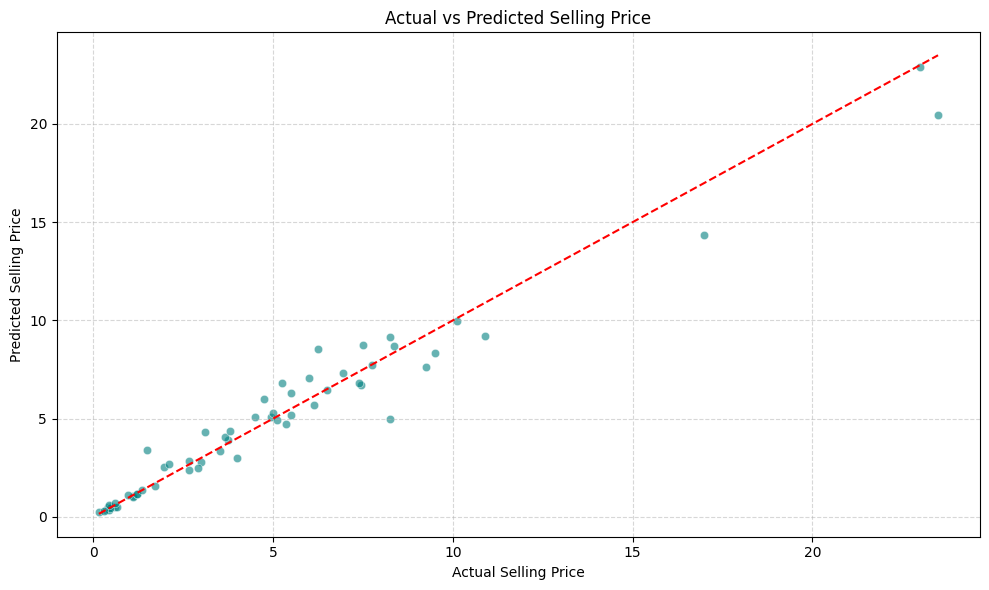

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']


X_encoded = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


model = XGBRegressor()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


# Calculate RMSE by taking the square root of the MSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='teal', alpha=0.6)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # خط مثالي
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [33]:
import joblib


joblib.dump(model, 'car_price_model.joblib')

['car_price_model.joblib']